In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pickle

In [3]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

(0, 110)

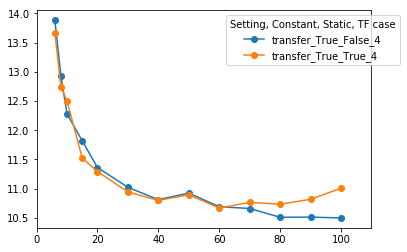

In [11]:
out = pickle.load(open('../predictions/lr-tf-SanDiego-Austin-static.pkl','r'))
out
for case in [4]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['Austin'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(label=algo, marker='o')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant, Static, TF case')
plt.xlim((0, 110))
# plt.savefig("../results/case-4-comparison.pdf", bbox_inches="tight", dpi=300, format='pdf')

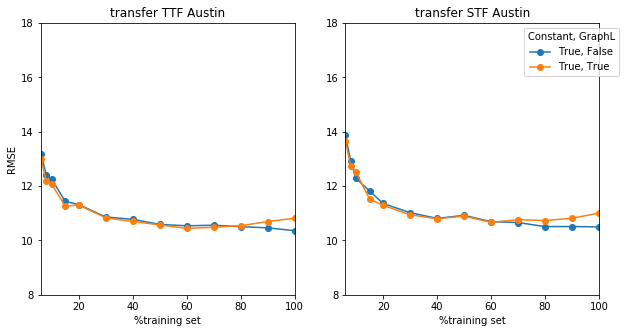

In [12]:
out = pickle.load(open('../predictions/lr-tf-SanDiego-Austin-static.pkl','r'))
out

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.flatten()
count = 0


for case in [2]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['Austin'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(8,18))
# ax[count].set_xlim(-5, 20)
ax[count].set_title("{} TTF Austin".format(transfer, case))
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
# count += 1
# for case in [2]:
#     for constant in ['True']:
#         for static in ['False','True']:
#             for transfer in ['transfer']:
#                 algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['Austin'])).sum(axis=1)
# #                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
#                 error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
# ax[count].set_title("{} case-{}".format(transfer, case))
# ax[count].set_xlabel('%training set')


count += 1
for case in [4]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['Austin'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(8,18))
# ax[count].set_xlim(-5, 20)


ax[count].set_title("{} STF Austin".format(transfer, case))
ax[count].set_xlabel('%training set')


# count += 1
# for case in [4]:
#     for constant in ['True']:
#         for static in ['False','True']:
#             for transfer in ['transfer']:
#                 algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['Austin'])).sum(axis=1)
# #                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
#                 error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
# ax[count].set_title("{} case-{}".format(transfer, case))
# ax[count].set_xlabel('%training set')


plt.legend(['True, False', 'True, True', 'False, False', 'False, True'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
# plt.xlim((0, 110))
plt.savefig("../results/Austin-static-comparison-transfer.pdf", bbox_inches="tight", dpi=300, format='pdf')

In [34]:
df = pd.DataFrame(out[2]['True']['True']['normal']).T
df['hvac']

6.0      18.289440
8.0      15.028147
10.0     14.683223
15.0     14.347367
20.0     14.534694
30.0     14.304959
40.0     12.945141
50.0     13.954135
60.0     13.349890
70.0     12.284580
80.0     12.991774
90.0     12.900284
100.0    13.720361
Name: hvac, dtype: float64

hvac
fridge
mw
dw
wm
oven


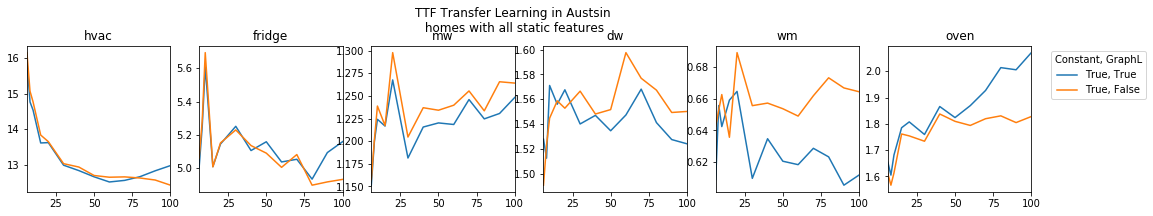

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))
ax = axes.flatten()
count = 0
for appliance in APPLIANCES_ORDER[1:]:
    print appliance
    df1 = pd.DataFrame(out[2]['True']['True']['transfer']).T[appliance]
    df2 = pd.DataFrame(out[2]['True']['False']['transfer']).T[appliance]
    df = pd.concat([df1, df2], axis=1)
    df.plot(ax=ax[count])
    ax[count].set_title(appliance)
    ax[count].legend().set_visible(False)
    count += 1
plt.legend(['True, True', 'True, False', 'False, False', 'False, True'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
fig.suptitle("TTF Transfer Learning in Austsin\n homes with all static features")
fig.subplots_adjust(top=0.8)
plt.savefig("../results/Austin-static-comparison-appliance-TTF-transfer.pdf", bbox_inches="tight", dpi=300, format='pdf')

hvac
fridge
mw
dw
wm
oven


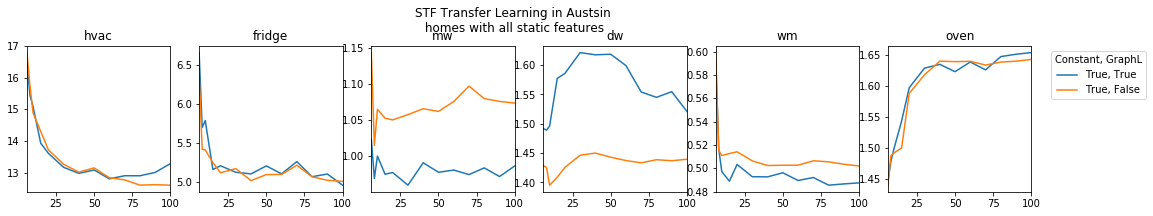

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))
ax = axes.flatten()
count = 0
for appliance in APPLIANCES_ORDER[1:]:
    print appliance
    df1 = pd.DataFrame(out[4]['True']['True']['transfer']).T[appliance]
    df2 = pd.DataFrame(out[4]['True']['False']['transfer']).T[appliance]
    df = pd.concat([df1, df2], axis=1)
    df.plot(ax=ax[count])
    ax[count].set_title(appliance)
    ax[count].legend().set_visible(False)
    count += 1
plt.legend(['True, True', 'True, False', 'False, False', 'False, True'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
fig.suptitle("STF Transfer Learning in Austsin\n homes with all static features")
fig.subplots_adjust(top=0.8)
plt.savefig("../results/Austin-static-comparison-appliance-STF-transfer.pdf", bbox_inches="tight", dpi=300, format='pdf')

(0, 110)

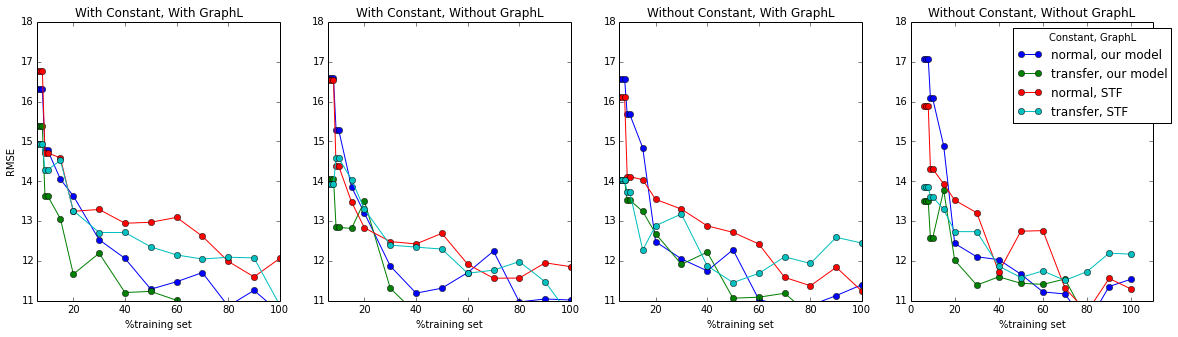

In [7]:
out = pickle.load(open('../predictions/lr-tf-SanDiego-Austin-all.pkl','r'))
out

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax = axes.flatten()
count = 0


for case in [2,4]:
    for constant in ['True']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("With Constant, With GraphL")
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
count += 1
for case in [2,4]:
    for constant in ['True']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("With Constant, Without GraphL")
ax[count].set_xlabel('%training set')


count += 1
for case in [2,4]:
    for constant in ['False']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(8,18))
ax[count].set_title("Without Constant, With GraphL")
ax[count].set_xlabel('%training set')


count += 1
for case in [2,4]:
    for constant in ['False']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(8,18))
ax[count].set_title("Without Constant, Without GraphL")
ax[count].set_xlabel('%training set')


plt.legend(['normal, our model', 'transfer, our model', 'normal, STF', 'transfer, STF'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
plt.xlim((0, 110))
# plt.savefig("../results/comparison.pdf", bbox_inches="tight", dpi=300, format='pdf')

In [49]:
(pd.DataFrame(out[2]['True']['True']['transfer']).T*pd.Series(contri['SanDiego'])).sum(axis=1)


KeyError: 'True'

In [50]:
(pd.DataFrame(out[4]['False']['True']['transfer']).T*pd.Series(contri['SanDiego'])).sum(axis=1)

KeyError: 'True'

In [51]:
out_old = pickle.load(open('../predictions/tf-Austin-SanDiego.pkl','r'))
prev_best = (pd.DataFrame(out_old[4]['True']['normal']).T*pd.Series(contri['SanDiego'])).sum(axis=1)
prev_best_algo = prev_best.loc[[10., 30., 50., 70., 90.]]
prev_best_algo

10.0    15.116675
30.0    12.730277
50.0    12.757884
70.0    12.259274
90.0    12.052088
dtype: float64

In [9]:
error
algo

'transfer_False_True_STF'

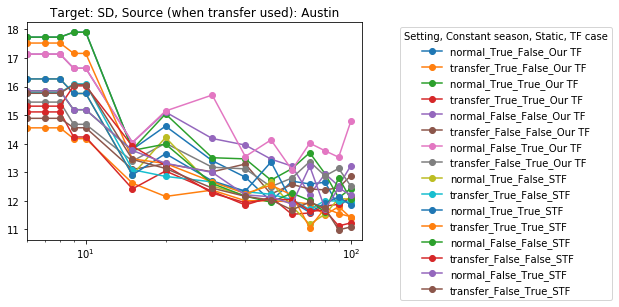

In [13]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))

mapping = {2:'Our TF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', 'False']:
    
        for static in ['False','True']:
            for transfer in ['normal','transfer']:
                try:
                    algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                    error = (pd.DataFrame(out[case][constant_use][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
                    if error.mean()>11:
                        error.plot(label=algo, marker='o', logx=True)
                except Exception, e:
                    print e
                    print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((-1, 110))
plt.title("Target: SD, Source (when transfer used): Austin")

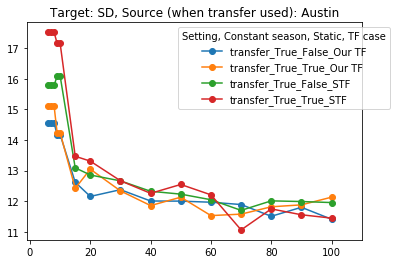

In [14]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))

mapping = {2:'Our TF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', False]:
    
        for static in ['False','True']:
            for transfer in ['transfer']:
                try:
                    algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                    error = (pd.DataFrame(out[case][constant_use][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
                    if error.mean()>11:
                        error.plot(label=algo, marker='o', logx=False)
                except Exception, e:
                    print e
                    print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((-1, 110))
plt.title("Target: SD, Source (when transfer used): Austin")


In [58]:
params = pickle.load(open('../predictions/params-lr-tf-SanDiego-Austin-static.pkl','r'))


In [69]:
case =2
constant_use = 'True'
static = 'True'
setting = 'normal'
lrs = {}
n_iter = {}
lam = {}
for train in [10, 30, 50, 70, 90]:
    lrs[train] = []
    n_iter[train] = []
    lam[train] = []
    for random_seed in range(4):
        for fold in range(10):
            lrs[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Learning Rate'])
            n_iter[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Iterations'])
            lam[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Lambda'])
    lrs[train] = pd.value_counts(pd.Series(lrs)[train])
    n_iter[train] = pd.value_counts(pd.Series(n_iter)[train])
    lam[train] = pd.value_counts(pd.Series(lam)[train])
lrs = pd.DataFrame(lrs)
n_iter = pd.DataFrame(n_iter)
lam = pd.DataFrame(lam)

In [61]:
pd.DataFrame(n_iter)

,10,30,50,70,90
100,2,NaN,1,3,NaN
700,14,12.0,12,13,32.0
1300,24,28.0,27,24,8.0


In [66]:
pd.DataFrame(lrs)

,10,30,50,70,90
0.5,17,16,20,18,31
1.0,23,24,20,22,9


In [70]:
lr_optimal = {}
for train in [10, 30, 50, 70, 90]:
    lr_optimal[train] = pd.value_counts(pd.DataFrame(lrs)[train])
    

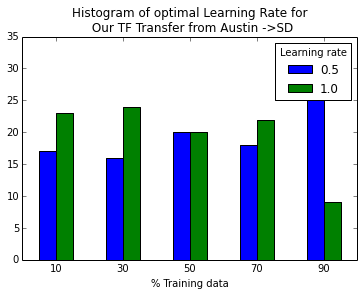

In [71]:
pd.DataFrame(lrs).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal Learning Rate for \n Our TF Transfer from Austin ->SD")
plt.legend(title="Learning rate")

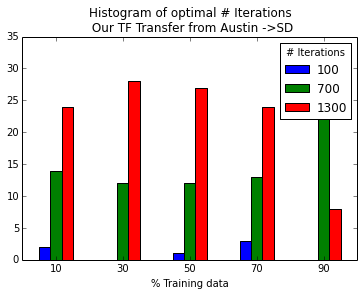

In [72]:
pd.DataFrame(n_iter).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal # Iterations \n Our TF Transfer from Austin ->SD")
plt.legend(title="# Iterations")

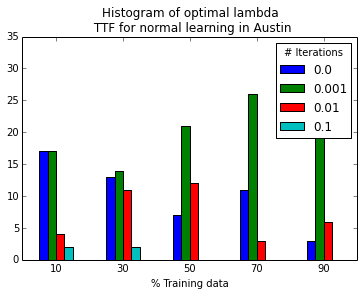

In [76]:
pd.DataFrame(lam).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal lambda \n TTF for normal learning in Austin")
plt.legend(title="# Iterations")